In [2]:
import sklearn as sk
import matplotlib as plt
import pandas as pd


# Use read_csv() to load the CSV file into a pandas DataFrame
data = pd.read_csv('Data/full_data.csv',low_memory=False)

bs_variables = [
    'strike',
    'stock',
    'tau',
    'sigma',
    'price',
    'call',
]


ann1_data = data[bs_variables]

In [ ]:
ann1_call_data = ann1_data[ann1_data.call == 1]
ann1_put_data = ann1_data[ann1_data.call == 0]

ann1_call_data.drop('call', axis = 1, inplace = True)
ann1_put_data.drop('call', axis = 1, inplace = True)

In [4]:
ann1_call_data

,strike,stock,tau,sigma,price
0,210.0,407.48,0.055556,0.223118,199.70
1,220.0,417.32,0.003968,0.223118,200.32
2,230.0,417.32,0.003968,0.223118,189.90
3,235.0,404.90,0.126984,0.223118,174.91
4,250.0,417.32,0.003968,0.223118,170.23
...,...,...,...,...,...
73147,0.5,0.38,0.079365,1.978739,0.05
73148,1.0,7.10,0.369048,1.064334,0.10
73149,2.0,7.10,0.365079,1.064334,0.05
73150,3.0,12.50,0.519841,1.064334,0.15


In [5]:
ann1_put_data

,strike,stock,tau,sigma,price
65,210.0,406.22,0.031746,0.223118,0.01
66,220.0,404.52,0.019841,0.223118,0.02
67,235.0,405.57,0.095238,0.223118,0.02
68,250.0,404.06,0.091270,0.223118,0.02
69,255.0,414.92,0.047619,0.223118,0.02
...,...,...,...,...,...
73144,4.0,3.48,0.642857,2.166917,2.15
73145,4.5,1.06,0.083333,2.166917,3.40
73146,5.5,2.36,0.436508,2.166917,3.43
73152,1.0,11.65,0.464286,1.064334,0.25


In [8]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import keras


# Separate features and target
X = ann1_call_data[['strike', 'stock', 'tau', 'sigma']]
y = ann1_call_data['price']


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 0)

ANN1_call = Sequential()
ANN1_call.add(Dense(10,input_dim = 4, activation = 'relu'))
ANN1_call.add(Dense(10, activation = 'relu'))
ANN1_call.add(Dense(10, activation = 'relu'))
ANN1_call.add(Dense(10, activation = 'relu'))
ANN1_call.add(Dense(1))

ANN1_call.compile(loss = 'mean_squared_error',optimizer = 'Adam')
ANN1_call.fit(X_train,y_train,epochs = 150, batch_size = 16)




Epoch 1/150

1945/1945 [==============================] - 7s 2ms/step - loss: 1773.2897
Epoch 2/150
1945/1945 [==============================] - 5s 3ms/step - loss: 747.6980
Epoch 3/150
1945/1945 [==============================] - 5s 2ms/step - loss: 734.7999
Epoch 4/150
1945/1945 [==============================] - 4s 2ms/step - loss: 722.0420
Epoch 5/150
1945/1945 [==============================] - 4s 2ms/step - loss: 719.3527
Epoch 6/150
1945/1945 [==============================] - 4s 2ms/step - loss: 681.6428
Epoch 7/150
1945/1945 [==============================] - 5s 2ms/step - loss: 724.6072
Epoch 8/150
1945/1945 [==============================] - 5s 2ms/step - loss: 671.5097
Epoch 9/150
1945/1945 [==============================] - 5s 2ms/step - loss: 678.7890
Epoch 10/150
1945/1945 [==============================] - 5s 2ms/step - loss: 676.3212
Epoch 11/150
1945/1945 [==============================] - 5s 2ms/step - loss: 677.9628
Epoch 12/150
1945/1945 [========================

244/244 [==============================] - 0s 2ms/step


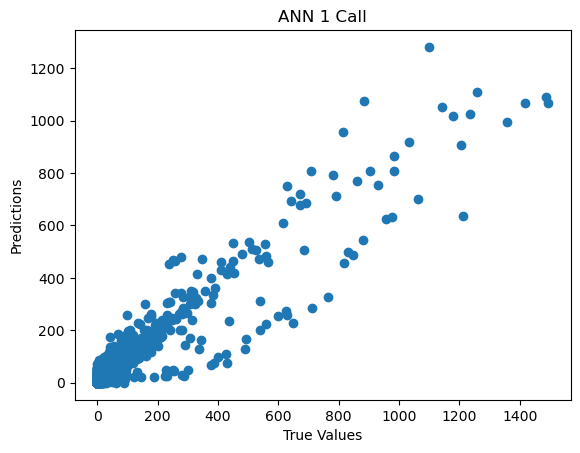

In [13]:
# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Separate features and target
X = ann1_call_data[['strike', 'stock', 'tau', 'sigma']]
y = ann1_call_data['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

# Make predictions
y_pred = ANN1_call.predict(X_test)

# Plot the true values against the predictions
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('ANN 1 Call')
plt.show()


In [14]:
# Separate features and target
X = ann1_put_data[['strike', 'stock', 'tau', 'sigma']]
y = ann1_put_data['price']


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 0)

ANN1_put = Sequential()
ANN1_put.add(Dense(10,input_dim = 4, activation = 'relu'))
ANN1_put.add(Dense(10, activation = 'relu'))
ANN1_put.add(Dense(10, activation = 'relu'))
ANN1_put.add(Dense(10, activation = 'relu'))
ANN1_put.add(Dense(1))

ANN1_put.compile(loss = 'mean_squared_error',optimizer = 'Adam')
ANN1_put.fit(X_train,y_train,epochs = 150, batch_size = 16)

Epoch 1/150
1714/1714 [==============================] - 5s 2ms/step - loss: 673.7722
Epoch 2/150
1714/1714 [==============================] - 4s 2ms/step - loss: 356.5642
Epoch 3/150
1714/1714 [==============================] - 4s 2ms/step - loss: 297.7450
Epoch 4/150
1714/1714 [==============================] - 4s 2ms/step - loss: 288.4966
Epoch 5/150
1714/1714 [==============================] - 4s 2ms/step - loss: 307.7832
Epoch 6/150
1714/1714 [==============================] - 4s 2ms/step - loss: 281.5774
Epoch 7/150
1714/1714 [==============================] - 4s 2ms/step - loss: 291.6555
Epoch 8/150
1714/1714 [==============================] - 4s 2ms/step - loss: 290.0550
Epoch 9/150
1714/1714 [==============================] - 4s 2ms/step - loss: 287.0888
Epoch 10/150
1714/1714 [==============================] - 4s 2ms/step - loss: 276.7893
Epoch 11/150
1714/1714 [==============================] - 4s 2ms/step - loss: 292.3435
Epoch 12/150
1714/1714 [============================

215/215 [==============================] - 1s 2ms/step


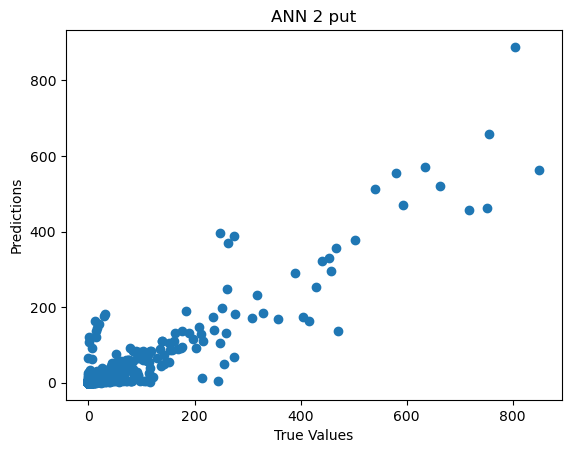

In [15]:
import matplotlib.pyplot as plt

# Assuming y_pred and y_test are defined
y_pred = ANN1_put.predict(X_test)

plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('ANN 2 put')
plt.show()


In [21]:
ANN1_call.save('models\\ann1\ANN1_call.keras')
ANN1_put.save('models\\ann1\ANN1_put.keras')